In [1]:
import numpy as np

# Part e

class BaryInterp:
    """
    Class takes in a numpy array of x_j with associated array of f_j
    """
        
    def __init__(self, x, f):
        self.x = x
        self.f = f
        
        n = len(x)
        W = np.ones((n, n))
        
        # Fill in subdiagonals
        for i in range(n):
            for j in range(i):
                W[i,j] = x[j] - x[i]
                
        # Fill in diagonals
        W[0,0] = 1
        for i in range(1, n):
            W[i,i] = np.prod(W[i,0:i]) * (-1) ** i
        
        # Multiply all values above
        for i in range(n):
            W[-1,i] = np.prod(W[:,i])
            
        self.w = np.reciprocal(W[-1,:])

        return
    
    def __call__(self, x):
        
        if x in self.x:
            return self.f[np.where(self.x == x)]
        else:
            num = 0
            den = 0
            for i in range(len(self.x)):
                num += self.w[i] * self.f[i]/(x - self.x[i])
                den += self.w[i]/(x - self.x[i])
            
            return num/den
    
    def update(self, x, f):
        self.x = np.append(self.x, x)
        self.f = np.append(self.f, f)
        
        n = len(x)
        N = len(self.x)
        
        W = np.ones((n, N))
        
        # Fill in subdiagonals
        for i in range(n):
            for j in range(N-n+i):
                W[i,j] = self.x[j] - self.x[N-n+i]
                
        # Fill in diagonals
        for i in range(n):
            W[i, n+i+1] = np.prod(W[i,0:N-n+i]) * (-1) ** (N-n+i)
        
        # Multiply all values above
        for i in range(N):
            W[-1,i] = np.prod(W[:,i])
        
        # Multiply by the old w^(N)
        self.w = np.append(np.reciprocal(self.w), np.ones((1,n))) * W[-1,:]
        self.w = np.reciprocal(self.w)
        return

Error is: -8.881784197001252e-16
Error is: -8.881784197001252e-16


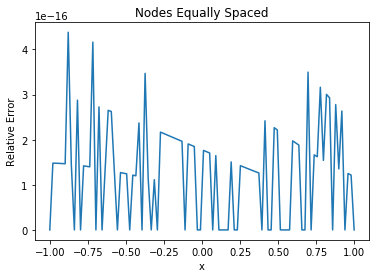

Max relative error: 4.381405446720176e-16


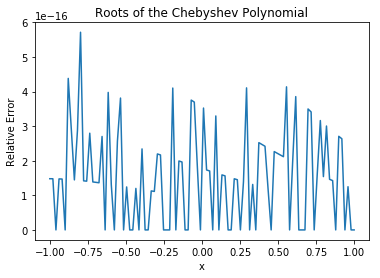

Max relative error: 5.716146789839242e-16


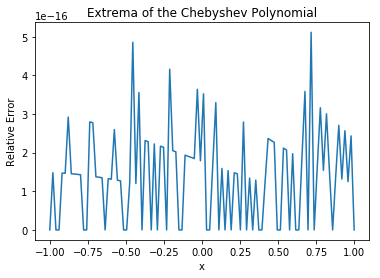

Max relative error: 5.117233981356311e-16


In [3]:
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt

# Part f

nodes = np.linspace(-1, 1, 5)
f = polyval(nodes, [5,4,3,2,1])

# Sanity check class
p = BaryInterp(nodes, f)
print('Error is: ' + str(p(0.25) - polyval(0.25, [5,4,3,2,1])))

# Proof that update works
nodes = np.linspace(-1, 1, 5)
f = polyval(nodes, [5,4,3,2,1])
p = BaryInterp(nodes[0:3], f[0:3])
p.update(nodes[3:], f[3:])
print('Error is: ' + str(p(0.25) - polyval(0.25, [5,4,3,2,1])))

# Equally spaced nodes
nodes = np.linspace(-1,1,5)
f = polyval(nodes, [5,4,3,2,1])
p = BaryInterp(nodes, f)

x = np.linspace(-1,1,100)
f_interp = np.array([p(i) for i in x])
f_actual = polyval(x, [5,4,3,2,1])
error = abs((f_interp-f_actual)/f_actual)

plt.plot(x, error)
plt.title('Nodes Equally Spaced')
plt.xlabel('x')
plt.ylabel('Relative Error')
plt.show()
print('Max relative error: ' + str(error.max()))

# Chebyshev Roots
import numpy.polynomial.chebyshev as cheb

nodes = cheb.chebroots((0,0,0,0,0,1))
f = polyval(nodes, [5,4,3,2,1])
p = BaryInterp(nodes, f)

x = np.linspace(-1,1,100)
f_interp = np.array([p(i) for i in x])
f_actual = polyval(x, [5,4,3,2,1])
error = abs((f_interp-f_actual)/f_actual)

plt.plot(x, error)
plt.title('Roots of the Chebyshev Polynomial')
plt.xlabel('x')
plt.ylabel('Relative Error')
plt.show()
print('Max relative error: ' + str(error.max()))

# Chebyshev Extrema
import math

nodes = [math.cos(k/4*math.pi) for k in range(5)]
f = polyval(nodes, [5,4,3,2,1])
p = BaryInterp(nodes, f)

x = np.linspace(-1,1,100)
f_interp = np.array([p(i) for i in x])
f_actual = polyval(x, [5,4,3,2,1])
error = abs((f_interp-f_actual)/f_actual)

plt.plot(x, error)
plt.title('Extrema of the Chebyshev Polynomial')
plt.xlabel('x')
plt.ylabel('Relative Error')
plt.show()
print('Max relative error: ' + str(error.max()))